In [706]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migraine-classification/data.csv


In [707]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score

In [708]:
data = pd.read_csv('/kaggle/input/migraine-classification/data.csv')

In [709]:
data.shape

(400, 24)

In [710]:
print('Number of training examples: %s' %str (data.shape [0]))
print('Number of features: %s' %str (data.shape [1]))


Number of training examples: 400
Number of features: 24


In [711]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [712]:
data['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In [713]:
data.Age.min() , data.Age.max()

(15, 77)

In [714]:
# data['Age'].value_counts()

<AxesSubplot:title={'center':'Range of Patient Age'}>

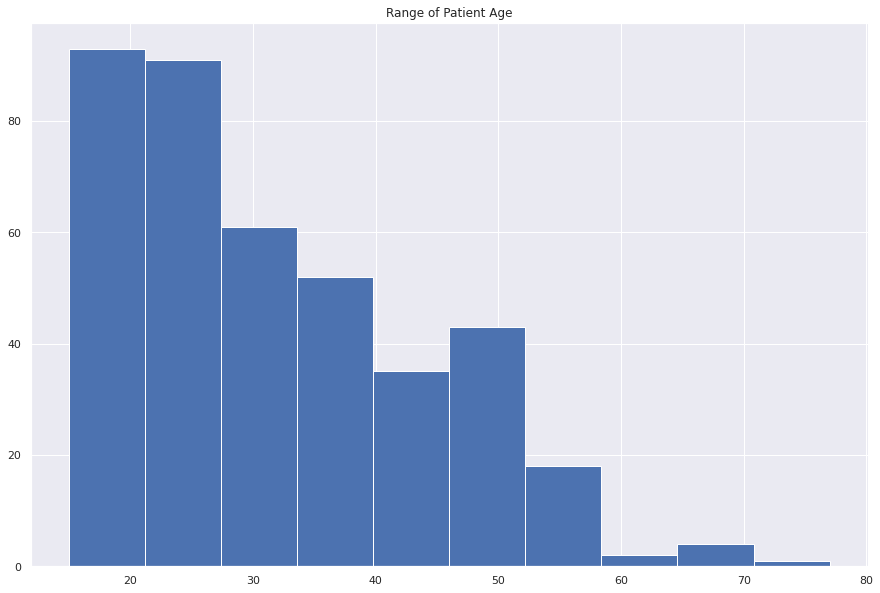

In [715]:
plt.title('Range of Patient Age')
data['Age'].hist()

In [716]:
data.Character.value_counts()

1    369
0     20
2     11
Name: Character, dtype: int64

<AxesSubplot:xlabel='Character', ylabel='count'>

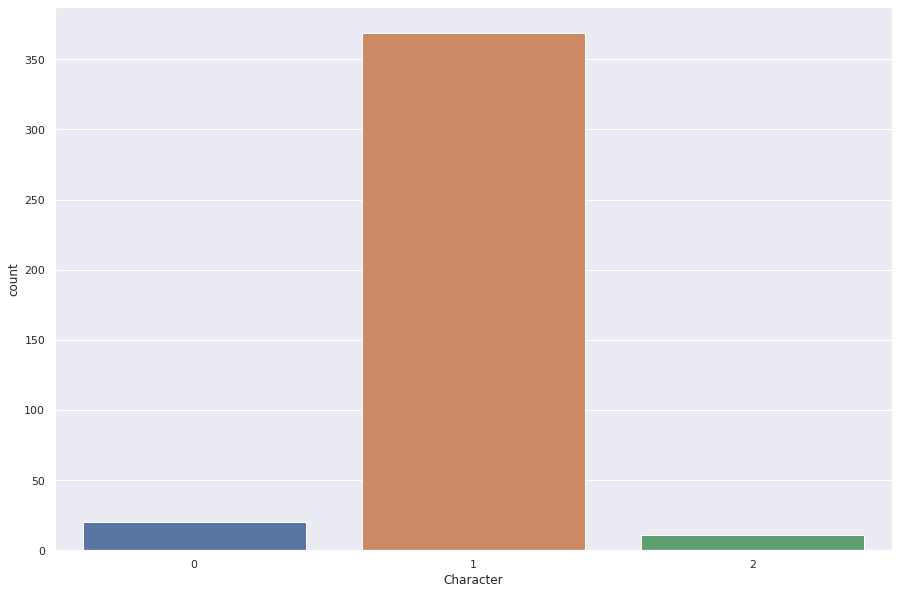

In [717]:
sns.countplot(x=data['Character'])

<AxesSubplot:xlabel='Defect', ylabel='count'>

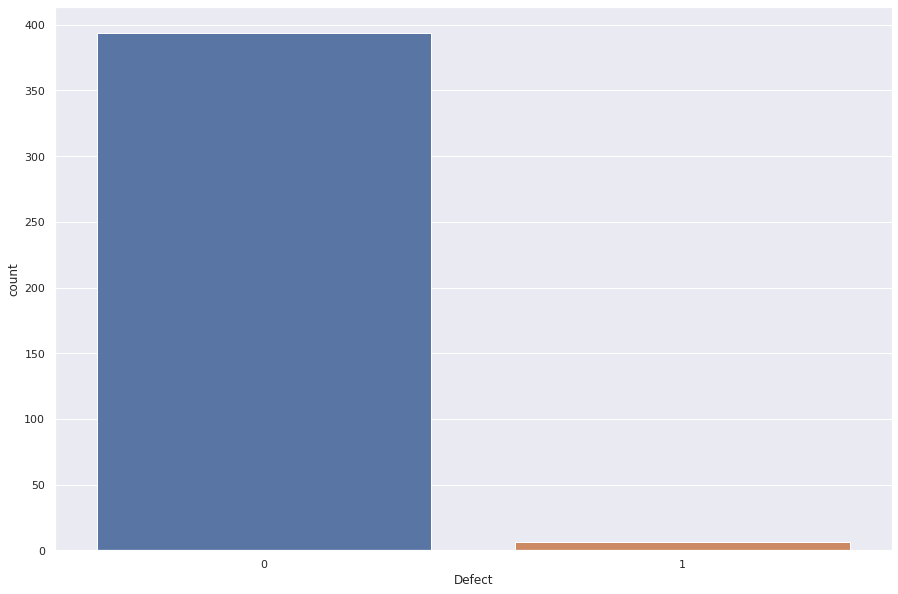

In [718]:
sns.countplot(x=data.Defect)

In [719]:
data.Type.value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

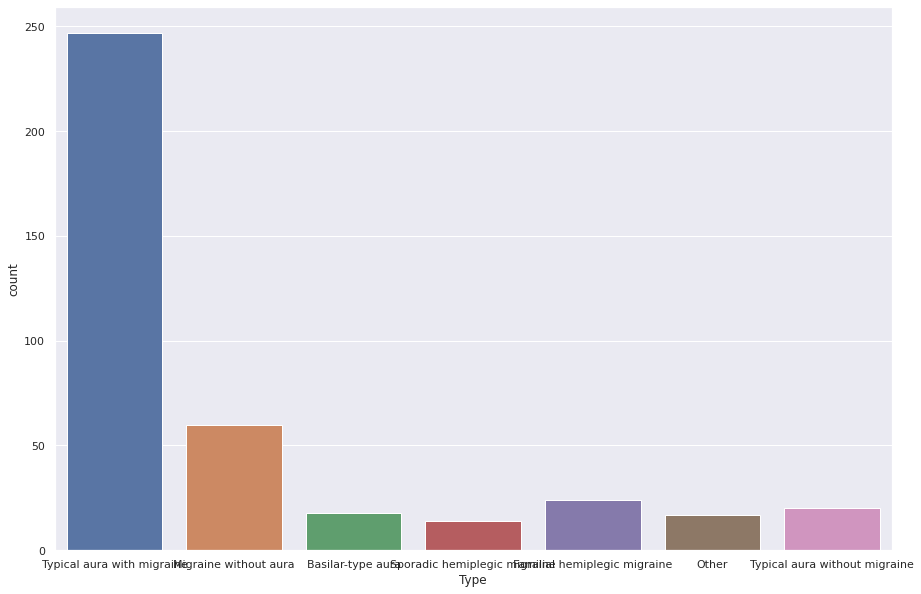

In [720]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x=data.Type)

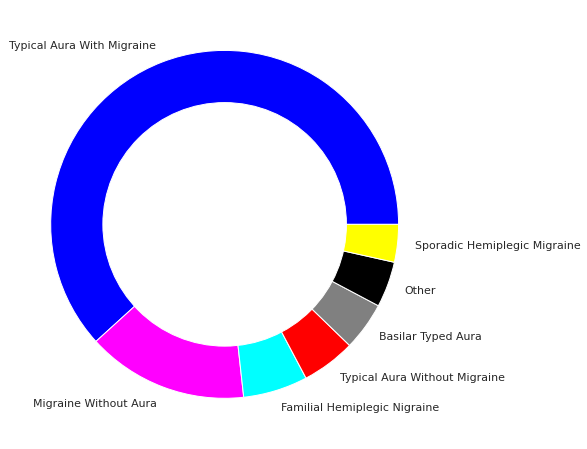

In [721]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

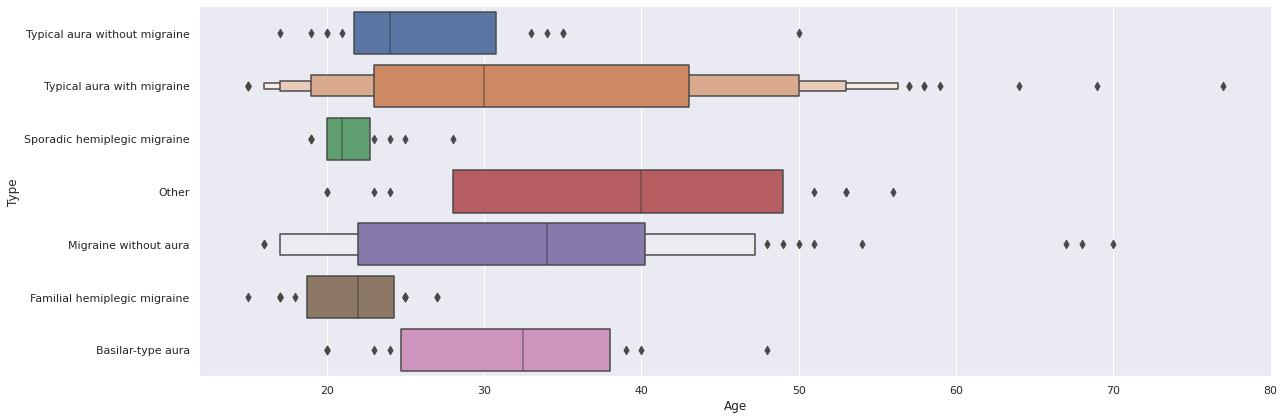

In [722]:

sns.catplot(y='Type', x='Age', data=data.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [723]:
data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [724]:
#dataframes

In [725]:
data_1 = data[data['Type'] == 'Typical aura with migraine']
data_2 = data[data['Type'] == 'Migraine without aura']
data_3 = data[data['Type'] == 'Familial hemiplegic migraine']
data_4 = data[data['Type'] == 'Typical aura without migraine']
data_5 = data[data['Type'] == 'Basilar-type aura']
data_6 = data[data['Type'] == 'Other']
data_7 = data[data['Type'] == 'Sporadic hemiplegic migraine']

In [726]:
data.shape

(400, 24)

In [727]:
400/7

57.142857142857146

In [728]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200, 
                           random_state=123, replace=True)

In [729]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, 
                          data_5_resample, data_6_resample, data_7_resample])

In [730]:
train_dataset.head(3)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [731]:
train_dataset.shape

(1447, 24)

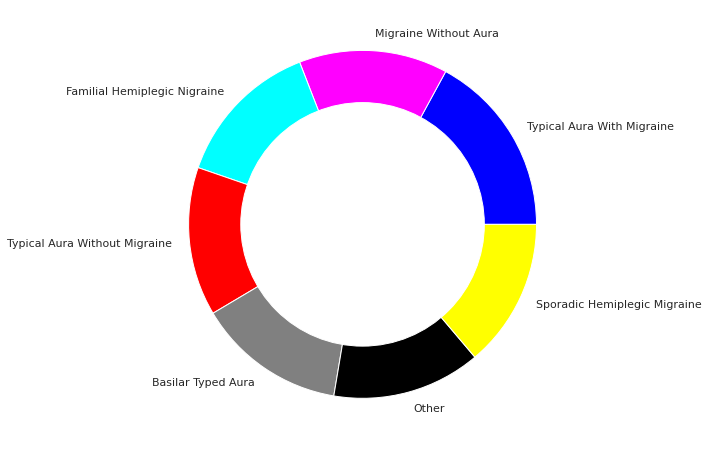

In [732]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

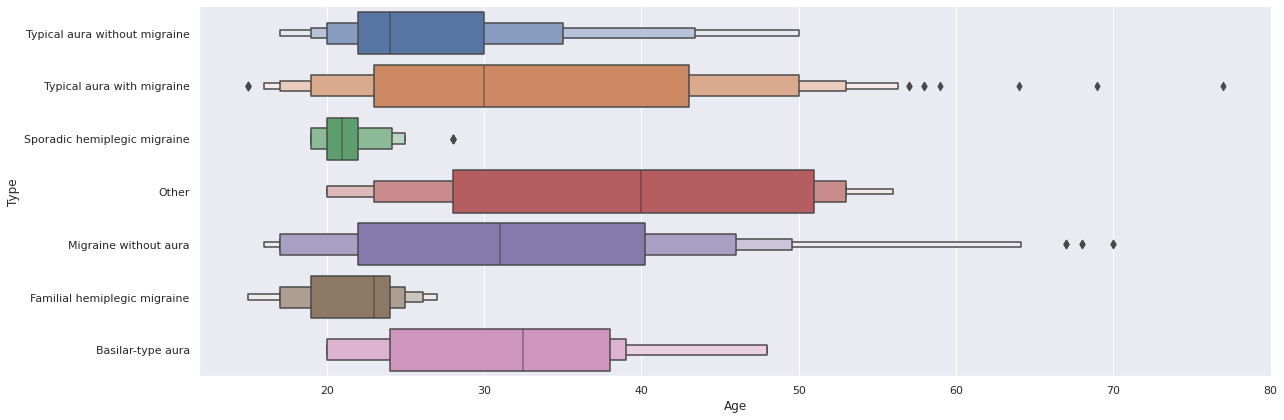

In [733]:
sns.catplot(y='Type', x='Age', data=train_dataset.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

In [734]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

In [735]:
X.shape , Y.shape

((1447, 23), (1447,))

In [736]:
X.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [737]:
Y.head(5)

0    Typical aura with migraine
1    Typical aura with migraine
2    Typical aura with migraine
3    Typical aura with migraine
4    Typical aura with migraine
Name: Type, dtype: object

In [738]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
(1157, 23)
(290, 23)
(1157,)
(290,)

(1157, 23)
(290, 23)
(1157,)
(290,)


(290,)

In [739]:
X_arr = np.array(X)
X_arr.shape, X.shape

((1447, 23), (1447, 23))

In [740]:
X_arr

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [21,  1,  1, ...,  0,  0,  0],
       [19,  1,  2, ...,  0,  0,  0],
       [24,  1,  1, ...,  0,  0,  0]])

In [741]:

from sklearn.preprocessing import LabelEncoder

In [742]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [743]:
labelled_Y = to_categorical(encoded_Y)

In [744]:
labelled_Y.shape

(1447, 7)

In [745]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                  labelled_Y, 
                                                  test_size=0.2, 
                                                  random_state=123)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1157, 23)
(290, 23)
(1157, 7)
(290, 7)


In [746]:
def naural_natwork():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [747]:
model= naural_natwork()

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)



model.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 1.7649 - accuracy: 0.3500 - val_loss: 1.3392 - val_accuracy: 0.4345
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 1.2250 - accuracy: 0.5454 - val_loss: 1.0618 - val_accuracy: 0.5724
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 0.7949 - accuracy: 0.7329 - val_loss: 0.6095 - val_accuracy: 0.8207
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 0.5641 - accuracy: 0.8116 - val_loss: 0.5050 - val_accuracy: 0.8690
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.4025 - accuracy: 0.8669 - val_loss: 0.4047 - val_accuracy: 0.8724
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 0.2979 - accuracy: 0.9118 - val_loss: 0.3477 - val_accuracy: 0.8621
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.2617 - accuracy: 0.9049 - val_loss: 0.4463 - val_accuracy: 0.8241
Epoch 8/100


In [748]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 903       
Total params: 177,415
Trainable params: 177,415
Non-trainable params: 0
_________________________________________________________________


In [749]:
hist= model.history.history

In [750]:
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [751]:
acc, val_acc = hist['accuracy'], hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']

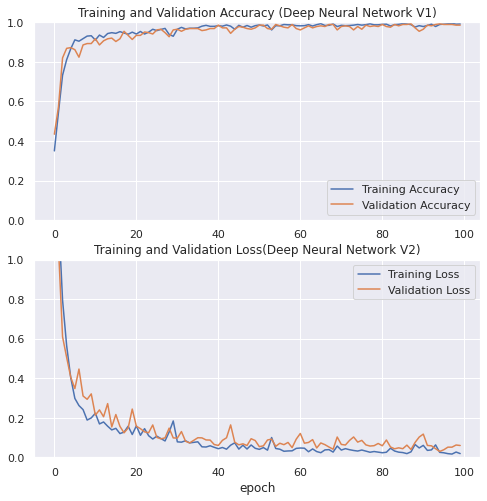

In [752]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V1)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss(Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [753]:
def neural_network_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_arr.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [754]:
model_2 = neural_network_2()
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               6144      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 455       
Total params: 47,751
Trainable params: 47,751
Non-trainable params: 0
_________________________________________________________________


In [755]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
              metrics=['accuracy'])

# setting a callback for controlling model's performance
callback = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)


# fitting the model to training data
model_2.fit(X_train, Y_train, 
          epochs=100, 
          validation_data=(X_test, Y_test), 
          verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 1.8469 - accuracy: 0.2939 - val_loss: 1.4517 - val_accuracy: 0.5483
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 1.2915 - accuracy: 0.5981 - val_loss: 1.2419 - val_accuracy: 0.4966
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.6992 - val_loss: 0.7901 - val_accuracy: 0.7414
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.7891 - val_loss: 0.5945 - val_accuracy: 0.7793
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.8358 - val_loss: 0.5181 - val_accuracy: 0.8345
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8531 - val_loss: 0.5192 - val_accuracy: 0.8414
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.3588 - accuracy: 0.8980 - val_loss: 0.4003 - val_accuracy: 0.8621
Epoch 8/100
3

In [756]:
hist_2 = model_2.history.history

In [757]:
acc_2, val_acc_2 = hist_2['accuracy'], hist_2['val_accuracy']
loss_2 = hist_2['loss']
val_loss_2 = hist_2['val_loss']

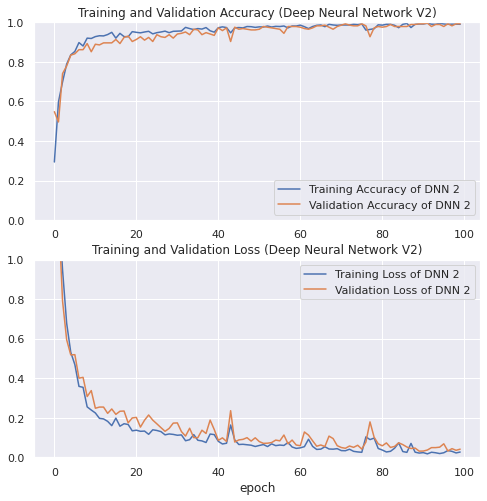

In [758]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_2, label='Training Accuracy of DNN 2')
plt.plot(val_acc_2, label='Validation Accuracy of DNN 2')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Deep Neural Network V2)')

print('')

plt.subplot(2, 1, 2)
plt.plot(loss_2, label='Training Loss of DNN 2')
plt.plot(val_loss_2, label='Validation Loss of DNN 2')
plt.ylim([0, 1.0])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Deep Neural Network V2)')
plt.xlabel('epoch')
plt.show()

In [759]:
# evaluate the model
score = model.evaluate(X_test, Y_test)
score_2 = model_2.evaluate(X_test, Y_test)

# print accuracies of models 
print("%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
print('Accuracy of First Deep Neural Network: %.2f' % (score[1]*100))
print('Loss of First Deep Neural Network: %.4f' % (score[0]))

print('')

print("%s: %.2f%%" % (model_2.metrics_names[1], score_2[1] * 100))
print('Accuracy of Second Deep Neural Network: %.2f' % (score_2[1]*100))
print('Loss of Second Deep Neural Network: %.4f' % (score_2[0]))

10/10 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9931
accuracy: 98.62%
Accuracy of First Deep Neural Network: 98.62
Loss of First Deep Neural Network: 0.0597

accuracy: 99.31%
Accuracy of Second Deep Neural Network: 99.31
Loss of Second Deep Neural Network: 0.0412


In [760]:
y_hat_nn1 = model.predict(X_test)
pred_nn1 = np.argmax(model.predict(X_test), axis=1)
Y_test_class_1 = np.argmax(Y_test, axis=1)

In [761]:
print('Classification Report of Deep Neural Network 1')
print(classification_report(Y_test_class_1, pred_nn1))

Classification Report of Deep Neural Network 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.91      1.00      0.95        31
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        36
           5       1.00      0.92      0.96        52
           6       1.00      1.00      1.00        43

    accuracy                           0.99       290
   macro avg       0.98      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290



In [762]:
# classification report of second neural network
y_hat_nn2 = model_2.predict(X_test)
pred_nn2 = np.argmax(model_2.predict(X_test), axis=1)
Y_test_class_2 = np.argmax(Y_test, axis=1)

In [763]:
print('Classification Report of Deep Neural Network 2')
print(classification_report(Y_test_class_2, pred_nn2))

Classification Report of Deep Neural Network 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        36
           5       1.00      0.96      0.98        52
           6       1.00      1.00      1.00        43

    accuracy                           0.99       290
   macro avg       0.99      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290

